In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Notebook goal: 

## Oxygen, DIC, TA linear relationships 
#### obtained from Debby's observational GRL dataset, JdF region

[O2 umol/kg] = -49.54 * [salinity psu] + 1763.29

[DIC umol/kg] = 68.98 * [salinity psu]  -100.14

[TA umol/kg] = 46.99 * [salinity psu]  + 666.62

In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# First let's plot with only the old GRL data and check that we retreive the old relationship we calculated:

- basically yes. (left panels, green and black line are almost on top of each other in this DIC vs sal space, difference is likely due to one or two datapoints that had incorrect locations in the original GRL datasets)

In [4]:
#imports

from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)


import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seawater
import netCDF4 as nc
from scipy import stats

from numpy import *
from scipy import *

import netCDF4 as nc
import numpy as np
import scipy as sp
import cmocean
import glob
import seawater
import arrow
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [8]:
infil = loadtxt('./Datasets/comb_goodoxy.txt')
# crid= infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
lat = infil[:,6]
lon = infil[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]*44.6596
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:, 20]
po4 = infil[:,21]
po4_qf = infil[:, 22]

print(np.shape(ox))

(1053,)


In [9]:
df = pd.read_csv('./Datasets/combined_fromdf.csv')
# df = pd.read_csv('./Datasets/GRL_fromdf.csv')


dic = df['dic'].to_numpy()
alk = df['alk'].to_numpy()
dic_qf = df['dic_qf'].to_numpy()
alk_qf = df['alk_qf'].to_numpy()
lat = df['lat'].to_numpy()
lon = df['lon'].to_numpy()
S = df['S'].to_numpy()
T = df['T'].to_numpy()
P = df['P'].to_numpy()
mon = df['mon'].to_numpy()
day = df['day'].to_numpy()
obs_i = df['obs_i'].to_numpy()
obs_j = df['obs_j'].to_numpy()
# (i <200) & (j>220) & (j<500)

mask = (((dic_qf==2) | (dic_qf==6)) & \
        ((alk_qf==2) | (alk_qf==6)) & \
        (dic > 0) & (alk >0))

mask_jdf = (((dic_qf==2) | (dic_qf==6)) & \
        ((alk_qf==2) | (alk_qf==6)) & \
        (dic > 0) & (alk >0) &  (obs_i <200) & (obs_j>220) & (obs_j<500))

totobs = (np.size(dic[mask]))

### get accessable subset


dens = seawater.dens(S,T,P)
sal_conv = S * 35.16504/35
# CONVERT FROM UMOL TO MMOL/M3
ta_conv=alk*dens/1000
dic_conv=dic*dens/1000
sal_conv = S * 35.16504/35
#sal_psu = S * 35.16504/35

### subset, converted to model units
dic_SS = dic[mask]
dic_SS = dic[mask]
sal_SSpsu = S[mask]
dic_SSconv = dic_conv[mask]
ta_SSconv = ta_conv[mask]
sal_SSconv = sal_conv[mask]
depth_SSconv = P[mask]; lat_SSconv = lat[mask]; lon_SSconv = lon[mask]
mon_SSconv = mon[mask]; day_SSconv = day[mask]; i_SSconv = obs_i[mask].astype(int);
j_SSconv = (obs_j[mask].astype(int))

#moddepth_SSconv = moddepth[mask]; depthdist_modobs_SSconv = depthdist_modobs[mask]
### subset, converted to model units
dic_SS = dic[mask]
ta_SS = alk[mask]
sal_SSpsu = S[mask]
dic_SSconv = dic_conv[mask]
ta_SSconv = ta_conv[mask]
sal_SSconv = sal_conv[mask]
depth_SSconv = P[mask]; lat_SSconv = lat[mask]; lon_SSconv = lon[mask]
mon_SSconv = mon[mask]; day_SSconv = day[mask]; i_SSconv = obs_i[mask].astype(int);
j_SSconv = (obs_j[mask].astype(int))


dic_JDF = dic[mask_jdf]
ta_JDF = alk[mask_jdf]
sal_JDFpsu = S[mask_jdf]
dic_JDFconv = dic_conv[mask_jdf]
ta_JDFconv = ta_conv[mask_jdf]
sal_JDFconv = sal_conv[mask_jdf]
depth_JDFconv = P[mask_jdf]; lat_JDFconv = lat[mask_jdf]; lon_JDFconv = lon[mask_jdf]
mon_JDFconv = mon[mask_jdf]; day_JDFconv = day[mask_jdf]; i_JDFconv = obs_i[mask_jdf].astype(int);
j_JDFconv = (obs_j[mask_jdf].astype(int))


print(np.shape(dic_SSconv))
print(np.shape(dic))

(572,)
(1053,)


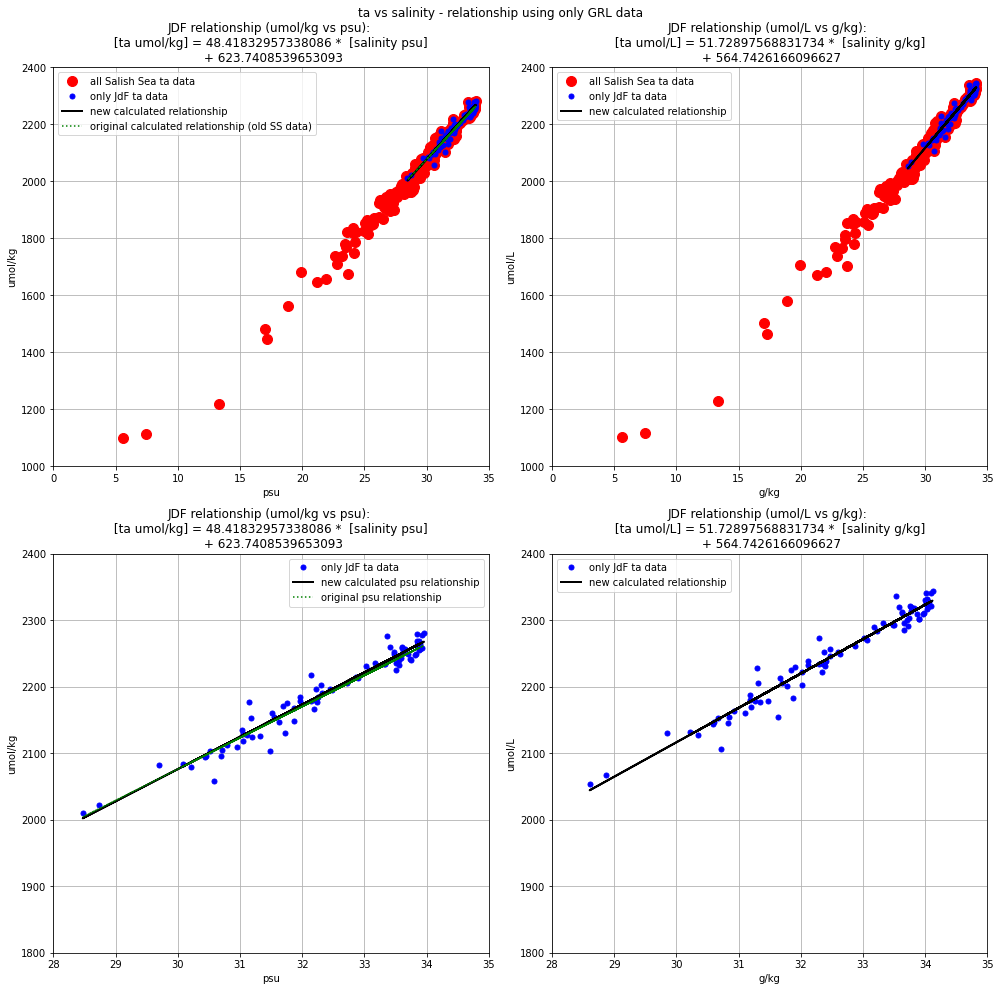


slope, intercept psu (GRL data only): 48.41832957338086, 623.7408539653093
slope, intercept corr. units (GRL data only): 51.72897568831734, 564.7426166096627


In [9]:
from scipy import stats 
smalltit = ['JdF','n. Strait', 's. Strait', 'Haro/Puget']
fact = 0.7
fig, axs = plt.subplots(2,2, figsize=(20*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].plot(sal_SSpsu, ta_SS, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all Salish Sea ta data')
axs[0].plot(sal_JDFpsu, ta_JDF, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF ta data')
slope_psu, intercept_psu, r_value, p_value, std_err = stats.linregress(sal_JDFpsu,ta_JDF)
line = slope_psu*sal_JDFpsu+intercept_psu
axs[0].plot(sal_JDFpsu,line,'-k', linewidth = 2, label = 'new calculated relationship')
oldline = 46.99 * sal_JDFpsu + 666.62
axs[0].plot(sal_JDFpsu,oldline,':g', label = 'original calculated relationship (old SS data)')
#[ta umol/kg] = 68.98 * [salinity psu]  -100.14
axs[0].set_title(f'JDF relationship (umol/kg vs psu): \n [ta umol/kg] = {slope_psu} *  [salinity psu] \n + {intercept_psu}' )
axs[0].legend()
axs[0].set_xlim([0,35]); axs[0].set_ylim([1000,2400]); axs[0].grid()
axs[0].set_xlabel('psu');axs[0].set_ylabel('umol/kg')

axs[1].plot(sal_SSconv, ta_SSconv, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all Salish Sea ta data')
axs[1].plot(sal_JDFconv, ta_JDFconv, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF ta data')
slope_conv, intercept_conv, r_value, p_value, std_err = stats.linregress(sal_JDFconv,ta_JDFconv)
line = slope_conv*sal_JDFconv+intercept_conv
axs[1].plot(sal_JDFconv,line,'-k', linewidth = 2, label = 'new calculated relationship')
oldline = 68.98 * sal_JDFconv - 100.14
#axs[1].plot(sal_JDFconv,oldline,':g', label = 'original calculated relationship (old SS data)')
#[ta umol/kg] = 68.98 * [salinity conv]  -100.14
axs[1].set_title(f'JDF relationship (umol/L vs g/kg): \n [ta umol/L] = {slope_conv} *  [salinity g/kg] \n + {intercept_conv}' )
axs[1].legend()
axs[1].set_xlim([0,35]); axs[1].set_ylim([1000,2400]); axs[1].grid()
axs[1].set_xlabel('g/kg');axs[1].set_ylabel('umol/L')
###

#axs[2].plot(sal_SSpsu, ta_SS, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all Salish Sea ta data')
axs[2].plot(sal_JDFpsu, ta_JDF, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF ta data')
slope_psu, intercept_psu, r_value, p_value, std_err = stats.linregress(sal_JDFpsu,ta_JDF)
line = slope_psu*sal_JDFpsu+intercept_psu
axs[2].plot(sal_JDFpsu,line,'-k', linewidth = 2, label = 'new calculated psu relationship')
oldline = 46.99 * sal_JDFpsu + 666.62
axs[2].plot(sal_JDFpsu,oldline,':g', label = 'original psu relationship ')
#[ta umol/kg] = 68.98 * [salinity psu]  -100.14
axs[2].set_title(f'JDF relationship (umol/kg vs psu): \n [ta umol/kg] = {slope_psu} *  [salinity psu] \n + {intercept_psu}' )
axs[2].legend()
axs[2].set_xlim([28,35]); axs[2].set_ylim([1800,2400]); axs[2].grid()
axs[2].set_xlabel('psu');axs[2].set_ylabel('umol/kg')

#axs[3].plot(sal_SSconv, ta_SSconv, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all Salish Sea ta data')
axs[3].plot(sal_JDFconv, ta_JDFconv, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF ta data')
GRLslope_conv, GRLintercept_conv, r_value, p_value, std_err = stats.linregress(sal_JDFconv,ta_JDFconv)
line = GRLslope_conv*sal_JDFconv+GRLintercept_conv
axs[3].plot(sal_JDFconv,line,'-k', linewidth = 2, label = 'new calculated relationship')
oldline = 46.99 * sal_JDFconv + 666.62
#axs[3].plot(sal_JDFconv,oldline,':g', label = 'original calculated relationship (old SS data)')
#[ta umol/kg] = 68.98 * [salinity conv]  -100.14
axs[3].set_title(f'JDF relationship (umol/L vs g/kg): \n [ta umol/L] = {slope_conv} *  [salinity g/kg] \n + {intercept_conv}' )
axs[3].legend()
axs[3].set_xlim([28,35]); axs[3].set_ylim([1800,2400]); axs[3].grid()
axs[3].set_xlabel('g/kg');axs[3].set_ylabel('umol/L')

fig.set_facecolor('w')
plt.suptitle('ta vs salinity - relationship using only GRL data')
plt.tight_layout()
plt.show()

print()

print(f'slope, intercept psu (GRL data only): {slope_psu}, {intercept_psu}')
print(f'slope, intercept corr. units (GRL data only): {slope_conv}, {intercept_conv}')


In [18]:
df = pd.read_csv('./Datasets/combined_fromdf.csv')


COMBdic = df['dic'].to_numpy()
COMBta = df['alk'].to_numpy()
COMBdic_qf = df['dic_qf'].to_numpy()
COMBalk_qf = df['alk_qf'].to_numpy()
COMBlat = df['lat'].to_numpy()
COMBlon = df['lon'].to_numpy()
COMBS = df['S'].to_numpy()
COMBT = df['T'].to_numpy()
COMBP = df['P'].to_numpy()
COMBmon = df['mon'].to_numpy()
COMBday = df['day'].to_numpy()
COMBobs_i = df['obs_i'].to_numpy()
COMBobs_j = df['obs_j'].to_numpy()
# (i <200) & (j>220) & (j<500)

mask = (((COMBdic_qf==2) | (COMBdic_qf==6)) & \
        ((COMBalk_qf==2) | (COMBalk_qf==6)) & \
        (COMBdic > 0) & (COMBalk >0))

mask_jdf = (((COMBdic_qf==2) | (COMBdic_qf==6)) & \
        ((COMBalk_qf==2) | (COMBalk_qf==6)) & \
        (COMBdic > 0) & (COMBalk >0) &  (COMBobs_i <200) & (COMBobs_j>220) & (COMBobs_j<500))


### get accessable subset


COMBdens = seawater.dens(COMBS,COMBT,COMBP)
COMBsal_conv = COMBS * 35.16504/35
# CONVERT FROM UMOL TO MMOL/M3
COMBta_conv=COMBta*COMBdens/1000
COMBdic_conv=COMBdic*COMBdens/1000
COMBsal_conv = COMBS * 35.16504/35
#sal_psu = S * 35.16504/35

### subset, converted to model units
COMBdic_SS = COMBdic[mask]
COMBta_SS = COMBta[mask]
COMBsal_SSpsu = COMBS[mask]
COMBdic_SSconv = COMBdic_conv[mask]
COMBta_SSconv = COMBta_conv[mask]
COMBsal_SSconv = COMBsal_conv[mask]
# COMBdepth_SSconv = COMBP[mask]; COMBlat_SSconv = COMBlat[mask]; COMBlon_SSconv = lon[mask]
# COMBmon_SSconv = COMBmon[mask]; COMBday_SSconv = COMBday[mask]; COMBi_SSconv = obs_i[mask].astype(int);
# COMBj_SSconv = (COMBobs_j[mask].astype(int))

COMBdic_JDF = COMBdic[mask_jdf]
COMBta_JDF = COMBta[mask_jdf]
COMBsal_JDFpsu = COMBS[mask_jdf]
COMBdic_JDFconv = COMBdic_conv[mask_jdf]
COMBta_JDFconv = COMBta_conv[mask_jdf]
COMBsal_JDFconv = COMBsal_conv[mask_jdf]
# COMBdepth_JDFconv = COMBP[mask_jdf]; COMBlat_JDFconv = COMBlat[mask_jdf]; COMBlon_JDFconv = lon[mask_jdf]
# COMBmon_JDFconv = COMBmon[mask_jdf]; COMBday_JDFconv = COMBday[mask_jdf]; COMBi_JDFconv = obs_i[mask_jdf].astype(int);
# COMBj_JDFconv = (COMBobs_j[mask_jdf].astype(int))

print(np.shape(COMBdic_SSconv))

(572,)


## ok add in the COMB dataset, which has some new data

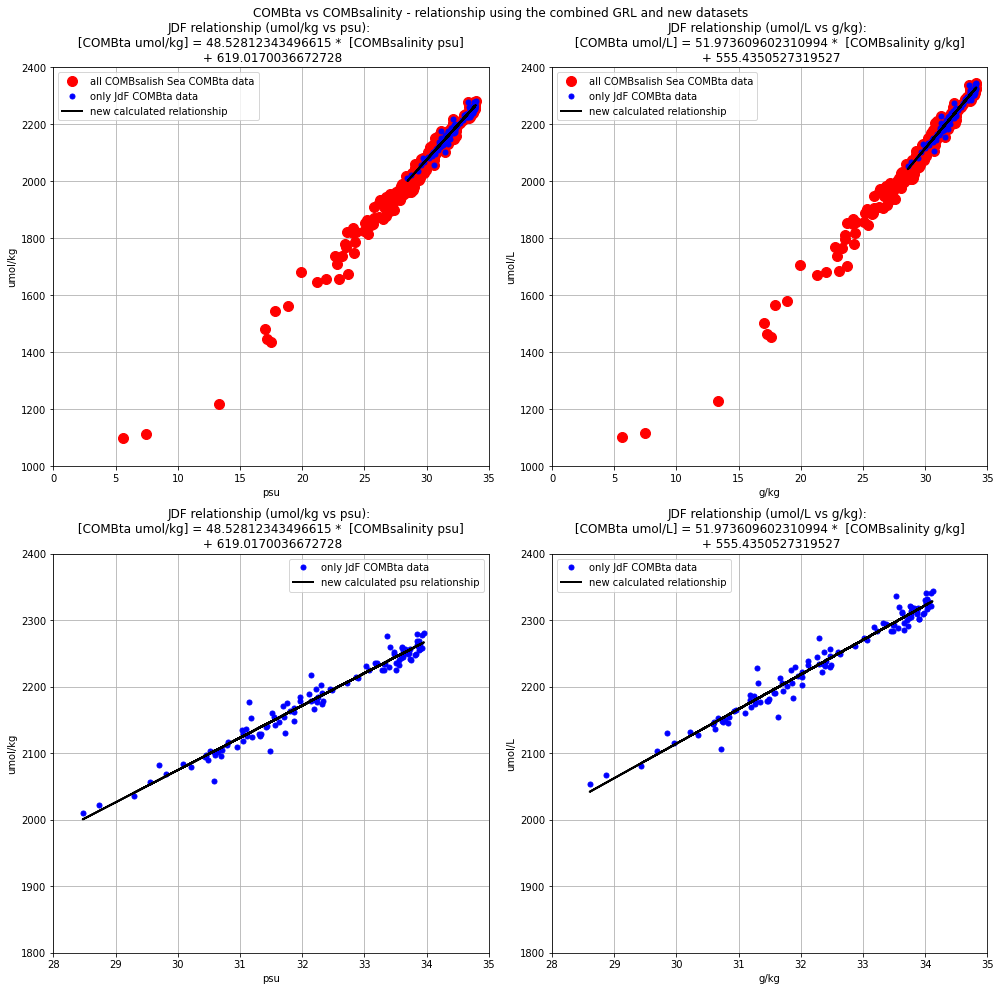


slope, intercept psu (combined data): 48.52812343496615, 619.0170036672728
slope, intercept corr. units (combined data): 51.973609602310994, 555.4350527319527


In [20]:
from scipy import stats 
smalltit = ['JdF','n. Strait', 's. Strait', 'Haro/Puget']
fact = 0.7
fig, axs = plt.subplots(2,2, figsize=(20*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
axs[0].plot(COMBsal_SSpsu, COMBta_SS, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all COMBsalish Sea COMBta data')
axs[0].plot(COMBsal_JDFpsu, COMBta_JDF, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF COMBta data')
slope_psu, intercept_psu, r_value, p_value, std_err = stats.linregress(COMBsal_JDFpsu,COMBta_JDF)
line = slope_psu*COMBsal_JDFpsu+intercept_psu
axs[0].plot(COMBsal_JDFpsu,line,'-k', linewidth = 2, label = 'new calculated relationship')
oldline = 68.98 * COMBsal_JDFpsu - 100.14
#axs[0].plot(COMBsal_JDFpsu,oldline,':g', label = 'original calculated relationship (old SS data)')
#[COMBta umol/kg] = 68.98 * [COMBsalinity psu]  -100.14
axs[0].set_title(f'JDF relationship (umol/kg vs psu): \n [COMBta umol/kg] = {slope_psu} *  [COMBsalinity psu] \n + {intercept_psu}' )
axs[0].legend()
axs[0].set_xlim([0,35]); axs[0].set_ylim([1000,2400]); axs[0].grid()
axs[0].set_xlabel('psu');axs[0].set_ylabel('umol/kg')

axs[1].plot(COMBsal_SSconv, COMBta_SSconv, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all COMBsalish Sea COMBta data')
axs[1].plot(COMBsal_JDFconv, COMBta_JDFconv, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF COMBta data')
slope_conv, intercept_conv, r_value, p_value, std_err = stats.linregress(COMBsal_JDFconv,COMBta_JDFconv)
line = slope_conv*COMBsal_JDFconv+intercept_conv
axs[1].plot(COMBsal_JDFconv,line,'-k', linewidth = 2, label = 'new calculated relationship')
oldline = 68.98 * COMBsal_JDFconv - 100.14
#axs[1].plot(COMBsal_JDFconv,oldline,':g', label = 'original calculated relationship (old SS data)')
#[COMBta umol/kg] = 68.98 * [COMBsalinity conv]  -100.14
axs[1].set_title(f'JDF relationship (umol/L vs g/kg): \n [COMBta umol/L] = {slope_conv} *  [COMBsalinity g/kg] \n + {intercept_conv}' )
axs[1].legend()
axs[1].set_xlim([0,35]); axs[1].set_ylim([1000,2400]); axs[1].grid()
axs[1].set_xlabel('g/kg');axs[1].set_ylabel('umol/L')
###

#axs[2].plot(COMBsal_SSpsu, COMBta_SS, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all COMBsalish Sea COMBta data')
axs[2].plot(COMBsal_JDFpsu, COMBta_JDF, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF COMBta data')
slope_psu, intercept_psu, r_value, p_value, std_err = stats.linregress(COMBsal_JDFpsu,COMBta_JDF)
line = slope_psu*COMBsal_JDFpsu+intercept_psu
axs[2].plot(COMBsal_JDFpsu,line,'-k', linewidth = 2, label = 'new calculated psu relationship')
oldline = 68.98 * COMBsal_JDFpsu - 100.14
#axs[2].plot(COMBsal_JDFpsu,oldline,':g', label = 'original psu relationship ')
#[COMBta umol/kg] = 68.98 * [COMBsalinity psu]  -100.14
axs[2].set_title(f'JDF relationship (umol/kg vs psu): \n [COMBta umol/kg] = {slope_psu} *  [COMBsalinity psu] \n + {intercept_psu}' )
axs[2].legend()
axs[2].set_xlim([28,35]); axs[2].set_ylim([1800,2400]); axs[2].grid()
axs[2].set_xlabel('psu');axs[2].set_ylabel('umol/kg')

#axs[3].plot(COMBsal_SSconv, COMBta_SSconv, marker = 'o', color = 'r', markersize = 10, linestyle = 'None', label = 'all COMBsalish Sea COMBta data')
axs[3].plot(COMBsal_JDFconv, COMBta_JDFconv, marker = 'o', color = 'b', markersize = 5, linestyle = 'None',  label = 'only JdF COMBta data')
COMBslope_conv, COMBintercept_conv, r_value, p_value, std_err = stats.linregress(COMBsal_JDFconv,COMBta_JDFconv)
line = COMBslope_conv*COMBsal_JDFconv+COMBintercept_conv
axs[3].plot(COMBsal_JDFconv,line,'-k', linewidth = 2, label = 'new calculated relationship')
oldline = 68.98 * COMBsal_JDFconv - 100.14
#axs[3].plot(COMBsal_JDFconv,oldline,':g', label = 'original calculated relationship (old SS data)')
#[COMBta umol/kg] = 68.98 * [COMBsalinity conv]  -100.14
axs[3].set_title(f'JDF relationship (umol/L vs g/kg): \n [COMBta umol/L] = {slope_conv} *  [COMBsalinity g/kg] \n + {intercept_conv}' )
axs[3].legend()
axs[3].set_xlim([28,35]); axs[3].set_ylim([1800,2400]); axs[3].grid()
axs[3].set_xlabel('g/kg');axs[3].set_ylabel('umol/L')

fig.set_facecolor('w')
plt.suptitle('COMBta vs COMBsalinity - relationship using the combined GRL and new datasets')
plt.tight_layout()
plt.show()

print()

print(f'slope, intercept psu (combined data): {slope_psu}, {intercept_psu}')
print(f'slope, intercept corr. units (combined data): {slope_conv}, {intercept_conv}')


## the new dataset yields a rel with lower DIC per unit salinity because of some mid-salinity datapoints. I don't think these really represent the open-ocean end-member, so maybe sticking to original dataset for a relationship is appropriate


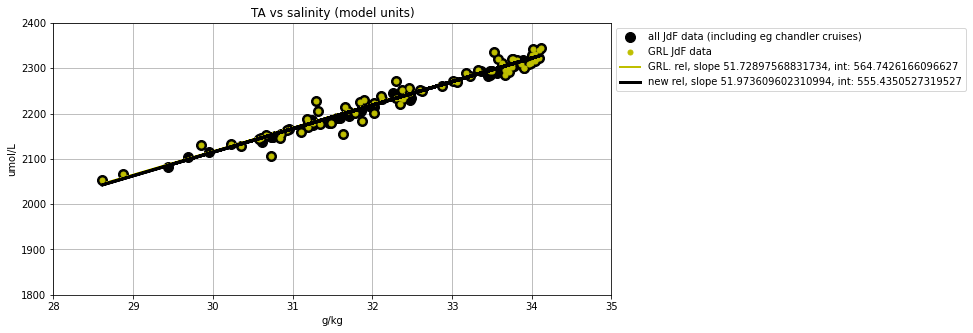

In [24]:
fact = 0.5
fig, axs = plt.subplots(1,1, figsize=(20*fact, 10*fact), facecolor='w', edgecolor='k')

axs.plot(COMBsal_JDFconv, COMBta_JDFconv, marker = 'o', color = 'k', markersize = 10, linestyle = 'None',  label = 'all JdF data (including eg chandler cruises)')
axs.plot(sal_JDFconv, ta_JDFconv, marker = 'o', color = 'y', markersize = 5, linestyle = 'None',  label = 'GRL JdF data')

line = GRLslope_conv*sal_JDFconv+GRLintercept_conv
axs.plot(sal_JDFconv,line,'-y', linewidth = 2, \
         label = f'GRL. rel, slope {GRLslope_conv}, int: {GRLintercept_conv}')
line = COMBslope_conv*COMBsal_JDFconv+COMBintercept_conv
axs.plot(COMBsal_JDFconv,line,'-k', linewidth = 3,\
         label = f'new rel, slope {COMBslope_conv}, int: {COMBintercept_conv}')

axs.set_xlim([28,35]); axs.set_ylim([1800,2400]); axs.grid()
axs.set_xlabel('g/kg');axs.set_ylabel('umol/L')
axs.set_title('TA vs salinity (model units)')
axs.legend(bbox_to_anchor = [1,1])